In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR

In [2]:
np.random.seed(42)
x = np.random.rand(100,1)
y = 1 + 2 * x +0.1 * np.random.randn(100,1)

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, TensorDataset
import torchvision
import torchvision.transforms as transforms

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(torch.cuda.is_available())

print(torch.cuda.device_count())

True
1


In [4]:
# Data
transform = transforms.ToTensor()
batch_size = 4
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [5]:
import matplotlib.pyplot as plt
import numpy as np

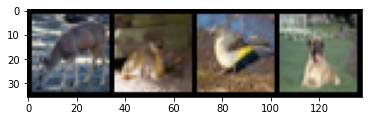

deer  deer  bird  dog  


In [6]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [50]:
class AutoEncoder(nn.Module):
  def __init__(self):
    super().__init__()

    self.encoder = nn.Sequential(
        nn.Conv2d(in_channels =3, out_channels = 8, kernel_size = 3, stride = 1, padding = 0),
        nn.ReLU(),
        #nn.MaxPool2d(2, 2),
        nn.Conv2d(in_channels =8, out_channels = 8, kernel_size = 3, stride = 1, padding = 0),
        #nn.MaxPool2d(2,2)
        nn.ReLU()
        
    )

    self.decoder = nn.Sequential(
        nn.ConvTranspose2d(in_channels =8, out_channels = 8, kernel_size = 3, stride = 1, padding = 0),
        nn.ReLU(),
        nn.ConvTranspose2d(in_channels =8, out_channels = 3, kernel_size = 3, stride = 1, padding = 0),
        #nn.Tanh()
       

    )

  def forward(self,x):
      encoded = self.encoder(x)
      decoded = self.decoder(encoded)
      return decoded

In [26]:
from torch.cuda import is_available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = AutoEncoder().to(device)
print(model)

AutoEncoder(
  (encoder): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(8, 8, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(8, 3, kernel_size=(3, 3), stride=(1, 1))
    (3): Sigmoid()
  )
)


In [16]:
from torch.cuda import is_available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = AutoEncoder().to(device)

loss_fn = nn.MSELoss(reduction = 'mean') #L2 Loss
lr = 0.1
n_epoches = 2
optimizer = optim.SGD(model.parameters(), lr = lr)
losses = []
for epoch in range(n_epoches):
  model.train()
  for i, data in enumerate(trainloader,0):
    inputs_batch, labels_batch = data

    #inputs = inputs_batch.to(device)
    #labels = labels_batch.to(device)

    outputs = model(inputs_batch)
    loss = loss_fn(outputs, labels_batch)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    losses.append(loss.item())



NotImplementedError: ignored

In [53]:
from torch.cuda import is_available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = AutoEncoder().to(device)

loss_fn = nn.MSELoss() #L2 Loss
lr = 0.001
n_epoches = 1
optimizer = optim.Adam(model.parameters(), lr = lr)
losses = []
for epoch in range(n_epoches):
  model.train()
  for i, data in enumerate(trainloader,0):
    inputs_batch, labels_batch = data

    inputs = inputs_batch.to(device)
    labels = labels_batch.to(device)

    outputs = model(inputs)
    loss = loss_fn(outputs, inputs)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if i%2000 == 1999:

        losses.append(loss.item())



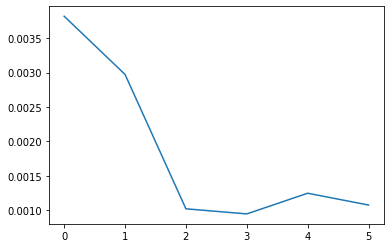

In [54]:
plt.plot(losses)

Original Images


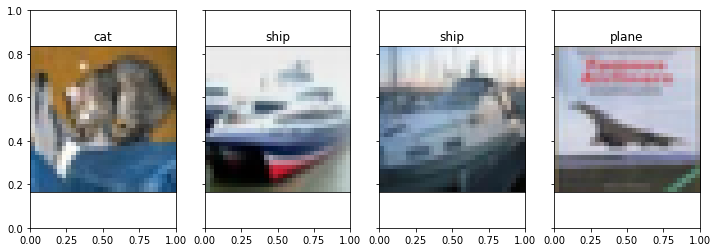

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Reconstructed Images


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


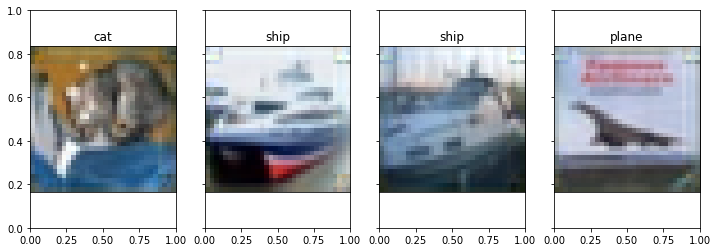

In [74]:
def imshow(img):
      
    plt.imshow(np.transpose(img, (1, 2, 0))) 

model.to('cpu')
dataiter = iter(testloader)
images, labels = dataiter.next()

output = model(images)
images = images.numpy()

output = output.view(batch_size, 3, 32, 32)
output = output.detach().numpy()

#Original Images
print("Original Images")
fig, axes = plt.subplots(nrows=1, ncols=4, sharex=True, sharey=True, figsize=(12,4))
for idx in np.arange(4):
    ax = fig.add_subplot(1, 4, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])
plt.show()

print('Reconstructed Images')
fig, axes = plt.subplots(nrows=1, ncols=4, sharex=True, sharey=True, figsize=(12,4))
for idx in np.arange(4):
    ax = fig.add_subplot(1, 4, idx+1, xticks=[], yticks=[])
    imshow(output[idx])
    ax.set_title(classes[labels[idx]])
plt.show() 

In [77]:
0.1 ** 0.5

0.31622776601683794

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, TensorDataset
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Data
transform = transforms.ToTensor()
batch_size = 1
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


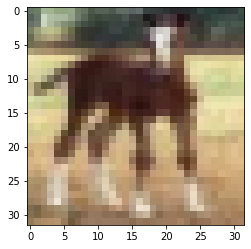

horse


In [3]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


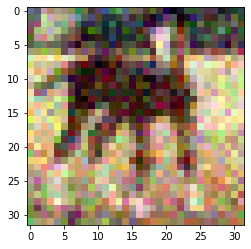

horse


In [10]:
def add_noise(inputs):
  noise1 = inputs + torch.randn_like(inputs) * 0.1
  noise = torch.clip(noise1, -1, 1)
  return noise

n_image = add_noise(images)

  # show images
imshow(torchvision.utils.make_grid(n_image))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [13]:
class AutoEncoder2(nn.Module):
  def __init__(self):
    super().__init__()

    self.encoder = nn.Sequential(
        nn.Conv2d(in_channels =3, out_channels = 8, kernel_size = 3, stride = 1, padding = 0),
        nn.ReLU(),
        #nn.MaxPool2d(2, 2),
        nn.Conv2d(in_channels =8, out_channels = 8, kernel_size = 3, stride = 1, padding = 0),
        #nn.MaxPool2d(2,2)
        nn.ReLU()
        
    )

    self.decoder = nn.Sequential(
        nn.ConvTranspose2d(in_channels =8, out_channels = 8, kernel_size = 3, stride = 1, padding = 0),
        nn.ReLU(),
        nn.ConvTranspose2d(in_channels =8, out_channels = 3, kernel_size = 3, stride = 1, padding = 0),
        #nn.Tanh()
       

    )

  def forward(self,x):
      encoded = self.encoder(x)
      decoded = self.decoder(encoded)
      return decoded

In [14]:
from torch.cuda import is_available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = AutoEncoder2().to(device)
print(model)

AutoEncoder2(
  (encoder): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(8, 8, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(8, 3, kernel_size=(3, 3), stride=(1, 1))
  )
)


In [17]:
from torch.cuda import is_available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = AutoEncoder2().to(device)

loss_fn = nn.MSELoss() #L2 Loss
lr = 0.0001
n_epoches = 1
optimizer = optim.Adam(model.parameters(), lr = lr)
losses = []
for epoch in range(n_epoches):
  model.train()
  for i, data in enumerate(trainloader,0):
    inputs_batch, labels_batch = data

    noise_input1 = add_noise(inputs_batch)

    noise_input = noise_input1.to(device)

    inputs = inputs_batch.to(device)
    labels = labels_batch.to(device)

    outputs = model(noise_input)
    loss = loss_fn(outputs, inputs)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if i%2000 == 1999:

        losses.append(loss.item())

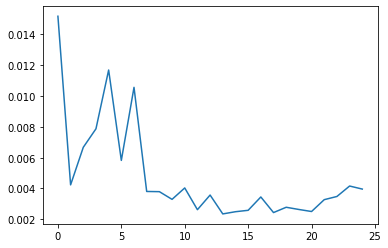

In [18]:
plt.plot(losses)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


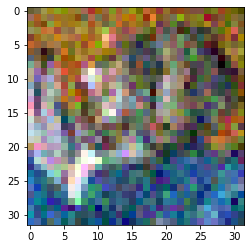

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


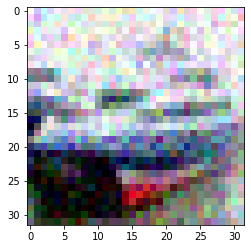

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


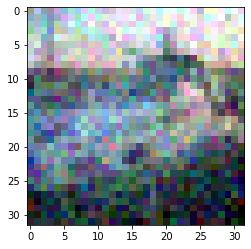

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


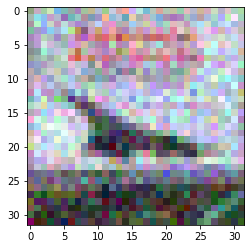

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


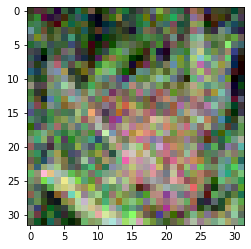

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


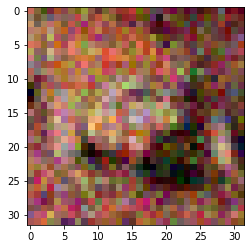

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


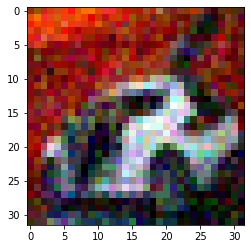

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


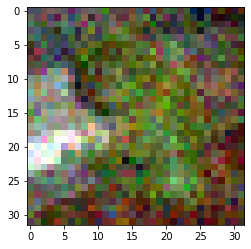

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


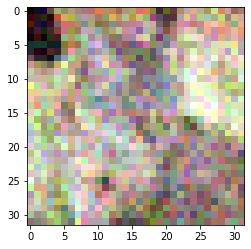

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


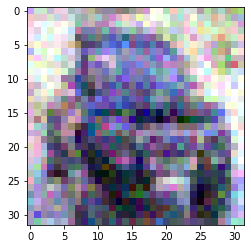

In [24]:
model.to('cpu')
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
dataiter = iter(testloader)


for i in range(10):
  images, labels = dataiter.next()
  noise_image = add_noise(images)
  
  imshow(torchvision.utils.make_grid(noise_image))

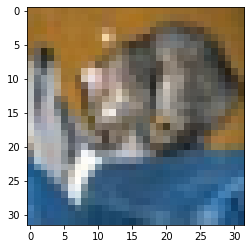

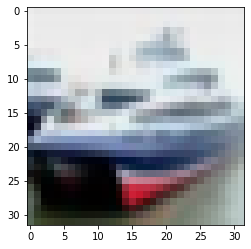

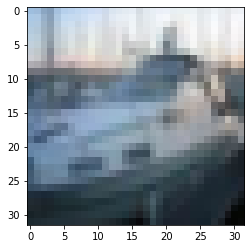

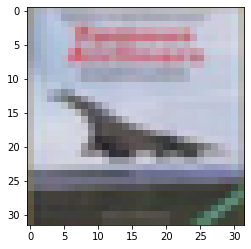

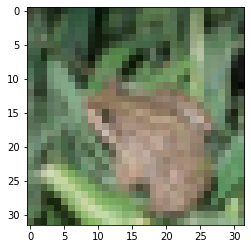

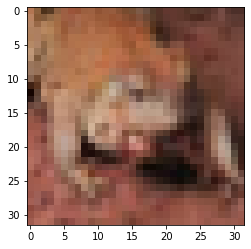

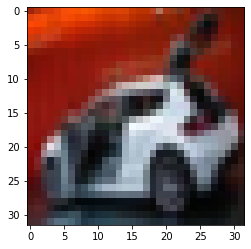

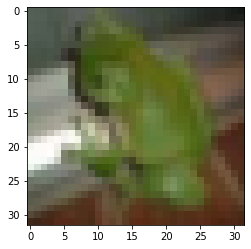

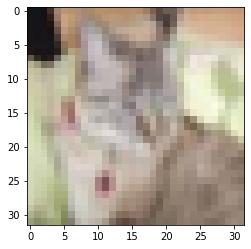

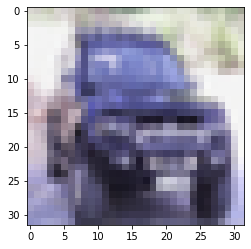

In [22]:

dataiter = iter(testloader)

for i in range(10):
  images, labels = dataiter.next()
  noise_image = add_noise(images)
  denoise_image = model(noise_image)
  imshow(torchvision.utils.make_grid(images))# show images

# print labels
#print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

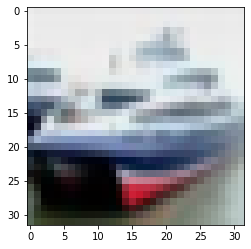

In [21]:
images, labels = dataiter.next()
noise_image = add_noise(images)
denoise_image = model(noise_image)
imshow(torchvision.utils.make_grid(images))

In [25]:
testset

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [27]:
from skimage.metrics import structural_similarity, peak_signal_noise_ratio


In [76]:
psnr = []
ssim = []
dataiter = iter(testloader)
for i in range(10000):
  images, labels = dataiter.next()

  org = images.numpy()

# np.transpose(npimg, (1, 2, 0))
  noise_image = add_noise(images)
  denoise = model(noise_image)

  
  with torch.no_grad():
    #denoise_image = np.transpose(denoise,(1,2,0))
    denoise_image_cpu = denoise_image.numpy()


  psnr.append(peak_signal_noise_ratio(org, denoise_image_cpu))

  ssim_org = np.moveaxis(org,1, -1)
  ssim_denoise = np.moveaxis(denoise_image_cpu, 1, -1)

  ssim.append(structural_similarity(ssim_org[0], ssim_denoise[0], multichannel = True))
  

  



In [40]:
from statistics import mean

In [77]:
mean(psnr)

10.603154280195861

In [78]:
mean(ssim)

0.1105478248576423

In [55]:
org.shape

(1, 3, 32, 32)

In [59]:
ssim_org.shape[1]

3

In [62]:
a = np.moveaxis(org,1, -1)

In [63]:
a.shape

(1, 32, 32, 3)

In [71]:
ssim_org[0].shape

(32, 32, 3)

In [70]:
ssim_denoise.shape

(1, 32, 32, 3)

In [72]:
structural_similarity(ssim_org[0], ssim_denoise[0], multichannel = True)

0.8832616817707809